In [1]:
import numpy as np
import os
from pathlib import Path
import sys

from pathlib import Path
sys.path.append(str(Path().absolute().parent))
from choseg import inference, utils
model_path = os.path.join(sys.path[-1], "choseg\weights\model_weights.pth")

C:\Users\s1522100\Documents\PhD Work\Python Scripts\Github\deepgpet\choseg\inference.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Load model and data

In [2]:
deepgpet = inference.InferenceModel(model_path=model_path, threshold=0.5) # Instantiate model, with desired threshold 

In [3]:
path_list = list(Path(sys.path[-1]).rglob("image*.png"))
img_list = [utils.load_img(path) for path in path_list]

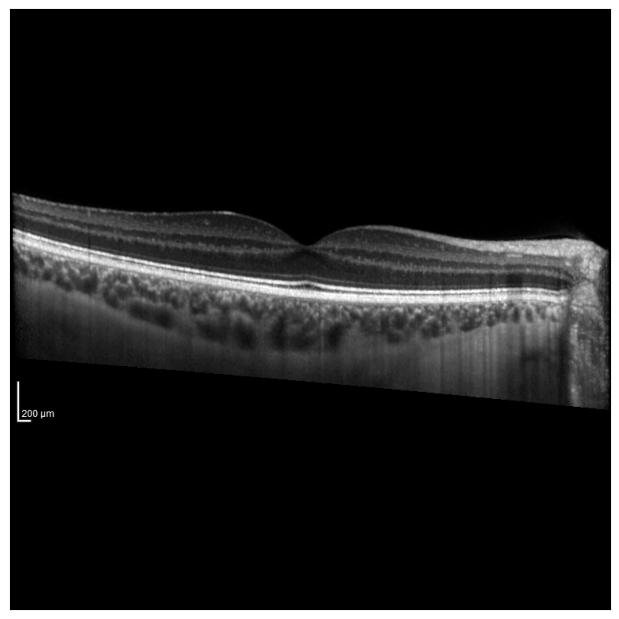

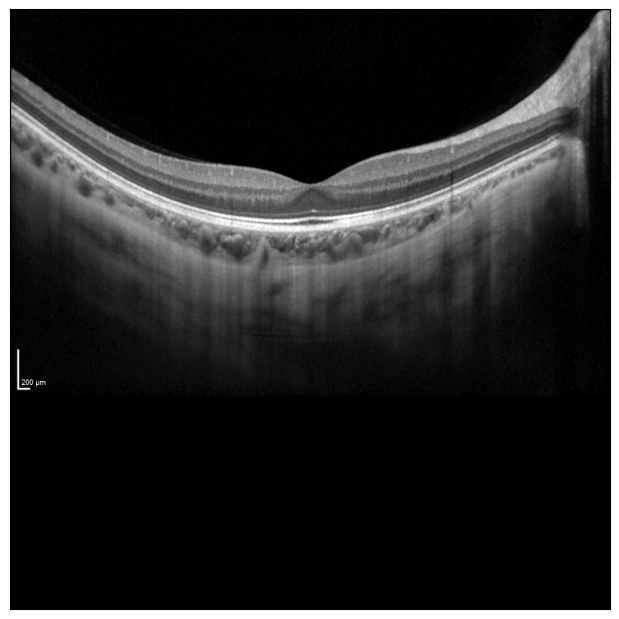

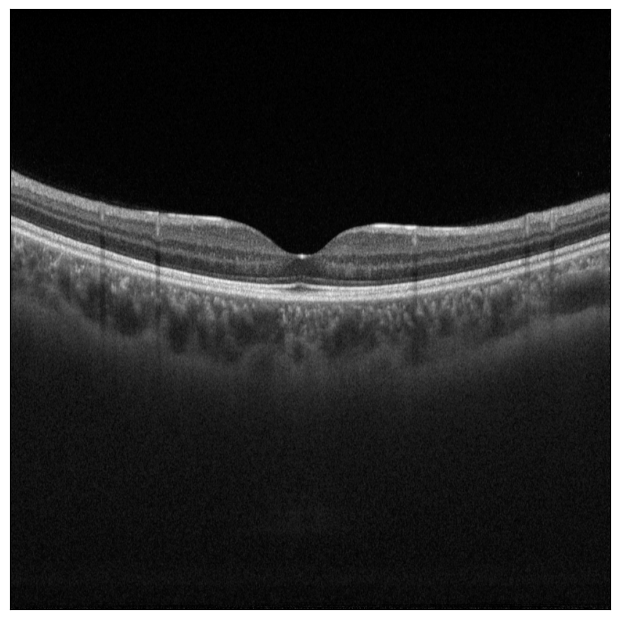

In [4]:
utils.plot_img(img_list[0])
utils.plot_img(img_list[1])
utils.plot_img(img_list[2])

# Inference

In [6]:
# Inference from a list of image paths or arrays 
# Note: batch_predict outputs list of predicted batches, i.e. lists of lists 
preds = deepgpet.batch_predict(path_list) # img_list

Predicting:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# Inference from a list of image paths or arrays
preds = deepgpet.predict_list(img_list) # path_list

  0%|          | 0/3 [00:00<?, ?it/s]

In [8]:
# Inference for a single image
pred = deepgpet.predict_img(img_list[0])
pred = deepgpet(img_list[0]) # same functionality as line above

# Postprocess segmentation

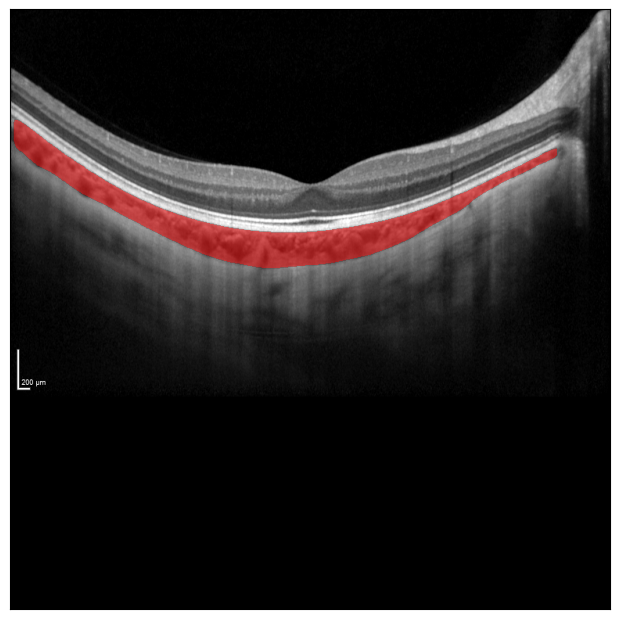

In [9]:
# Overlay RGBA colormap of segmentation mask onto image (cmap=0 is Red, 1 is Blue, 2 is Green)
idx = 1
pred_cmap = utils.generate_imgmask(preds[idx], thresh=None, cmap=0)
utils.plot_img(img_list[idx], cmap=pred_cmap)

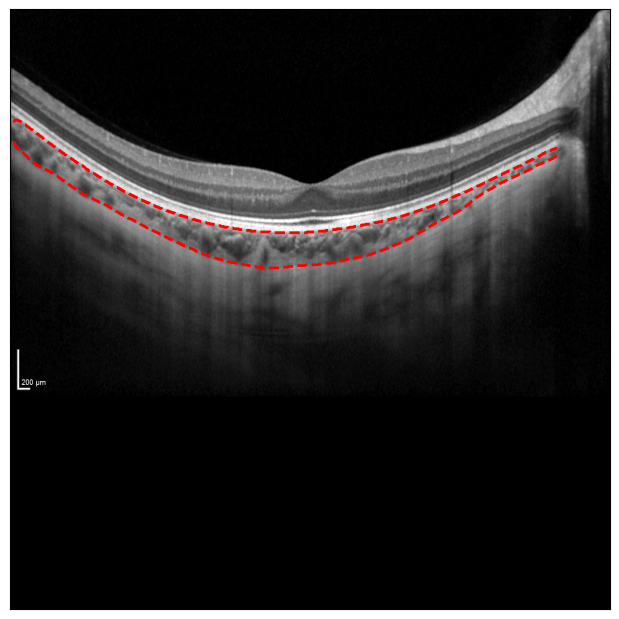

In [10]:
# Extract individual upper and lower boundaries from binary mask
idx = 1
pred_traces = utils.extract_bounds(preds[idx])
utils.plot_img(img_list[idx], traces=pred_traces)

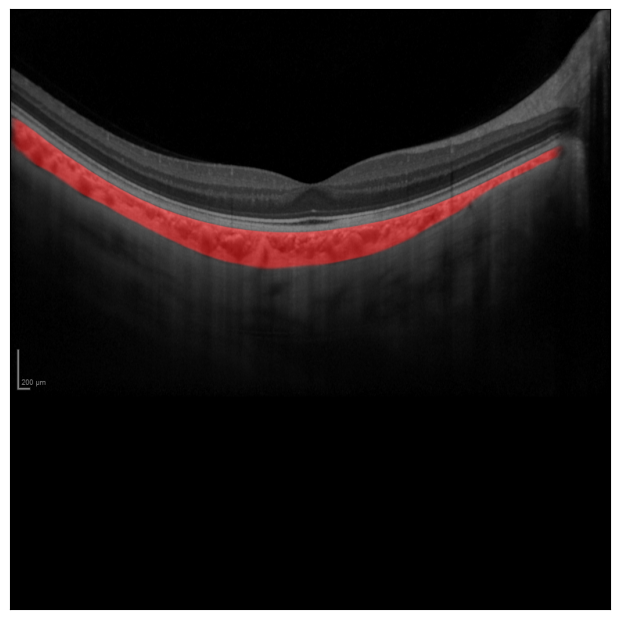

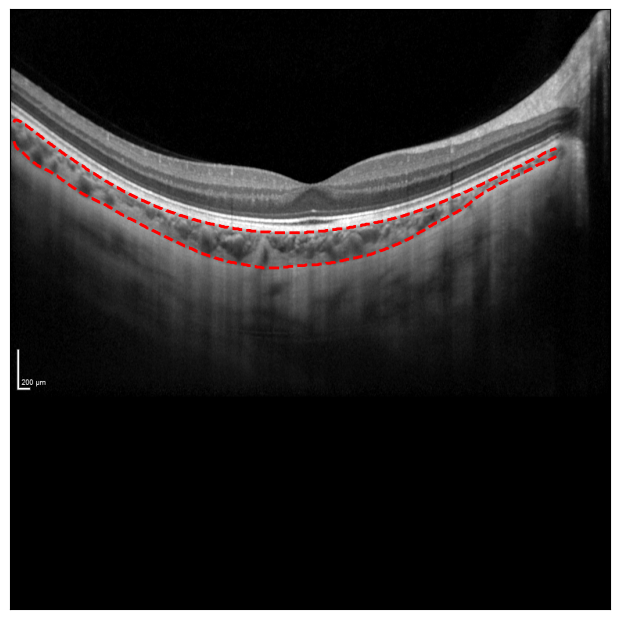

In [11]:
# Postprocessing wrapper:
# this will threshold a probability map, 
# extract the traces, 
# Select the largest mask to enforce connectivity,
# interpolate to make sure trace is evaluated across range of x-values.

# Inference for a single image
idx = 1
soft_thresh = deepgpet.predict_img(img_list[idx], soft_pred=True)
pred_traces = utils.get_trace(soft_thresh, threshold=0.5)
utils.plot_img(img_list[idx], cmap=utils.generate_imgmask(soft_thresh)) # Plotting probability map RGBA ontop of original OCT
utils.plot_img(img_list[idx], traces=pred_traces) # Plotting extracted upper and lower boundary traces ontop of original OCT

# Show results on all images

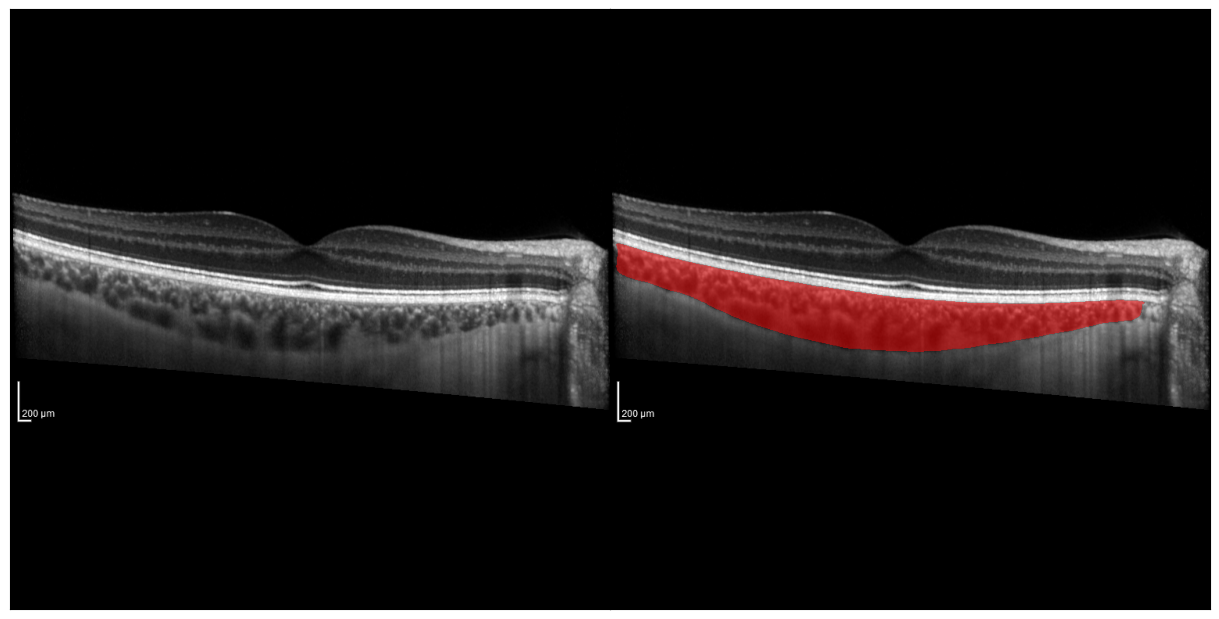

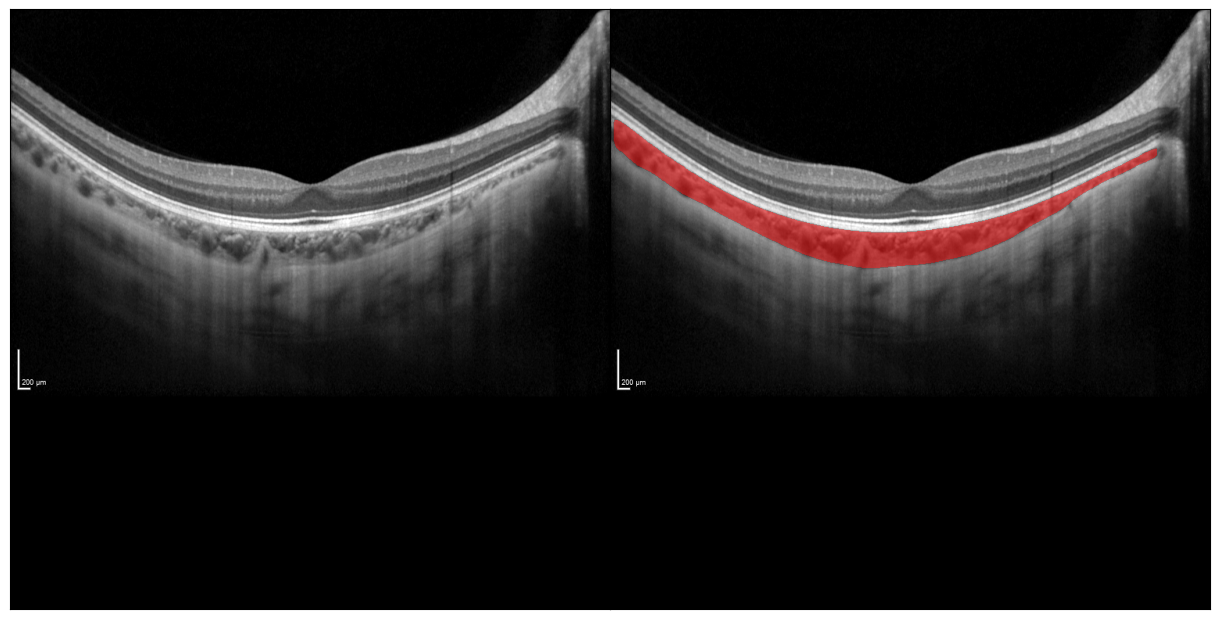

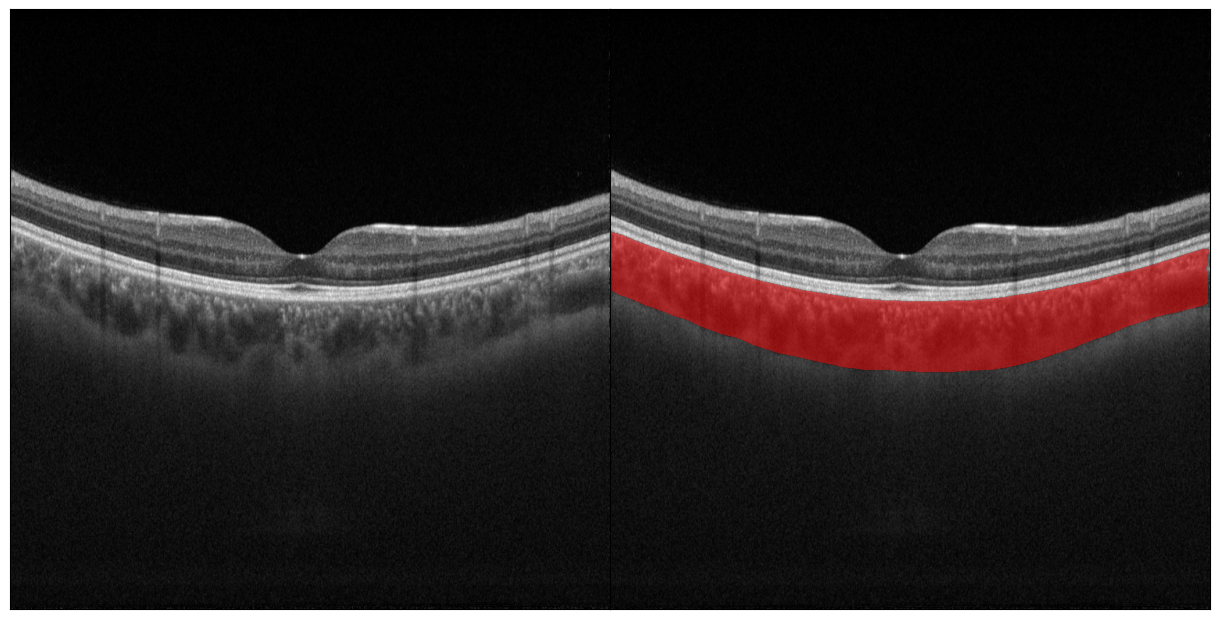

In [12]:
for img, seg in zip(img_list, preds):
    utils.plot_img(img, cmap=utils.generate_imgmask(seg), sidebyside=True)